10000
218
10000
68
[1 0 0 ... 0 1 0]
(25000,)
Epoch 1/20
30/30 [==============================] - 1s 43ms/step - loss: 2.6174 - accuracy: 0.6249 - val_loss: 1.1398 - val_accuracy: 0.7848
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 1.1179 - accuracy: 0.7330 - val_loss: 1.0932 - val_accuracy: 0.8028
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 1.0749 - accuracy: 0.7686 - val_loss: 1.0590 - val_accuracy: 0.8054
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 1.0423 - accuracy: 0.7846 - val_loss: 1.0758 - val_accuracy: 0.7576
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 1.0211 - accuracy: 0.7929 - val_loss: 1.0235 - val_accuracy: 0.8033
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.9999 - accuracy: 0.8042 - val_loss: 1.0209 - val_accuracy: 0.7935
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.9873 - accuracy: 0.8039 - val_los

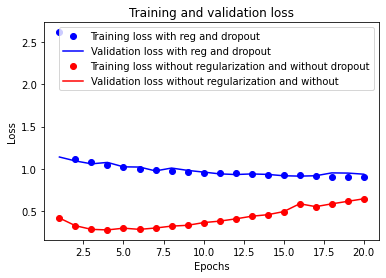

KeyError: ignored

<Figure size 432x288 with 0 Axes>

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import regularizers
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):#prend en paramètre une séquence de nombre et la transforme en liste de liste de nombre shape:(nombre d'exemple,10000)
    results = np.zeros((len(sequences), dimension))#len(sequence)=nombre d'exemples
    print(dimension)
    print(len(sequences[0]))
    for i in range (len (sequences)):
        for j in range (len (sequences [i])):
            results [i] [sequences [i] [j]] = 1.#on prend l'indice de cet entier et l'indice de cet entier dans le vecteur
    return results#ok


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)




y_train = np.asarray(train_labels).astype('float32')
print(train_labels)
print(train_labels.shape)
y_test = np.asarray(test_labels).astype('float32')
     
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(16,kernel_regularizer=regularizers.l1(0.005), activation='relu', input_shape=(10000,)))
model.add(Dense(16,kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(Dropout(.2, input_shape=(10000,)))
model.add(Dense(1, activation='sigmoid'))



model1 = Sequential()
model1.add(Dense(16, activation='relu', input_shape=(10000,)))

model1.add(Dense(16, activation='relu', input_shape=(10000,)))
#model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))



model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model1.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

    
x_val = x_train[:10000]
partial_x_train = x_train[10000:]


y_val = y_train[:10000]
partial_y_train = y_train[10000:]
 

history = model.fit (partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))
history1 = model1.fit (partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

 
import matplotlib.pyplot as plt
history_dict = history.history
history_dict1 = history1.history


loss_values = history_dict['loss']
loss_values1 = history_dict1['loss']

val_loss_values = history_dict['val_loss']
val_loss_values1 = history_dict1['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss with reg and dropout')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss with reg and dropout')

plt.plot(epochs, val_loss_values1, 'ro', label='Training loss without regularization and without dropout')
plt.plot(epochs, val_loss_values1, 'r', label='Validation loss without regularization and without' )

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf() #Clears the figure
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()







NameError: ignored

[1 0 0 ... 0 1 0]
(25000,)
